<a href="https://colab.research.google.com/github/abhinavj98/machine-learning/blob/master/mnist_lr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib
import sklearn.datasets
import sklearn.model_selection
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
import random

from datetime import datetime
from sklearn.model_selection import train_test_split
%matplotlib inline

In [0]:
random.seed(datetime.now())

mnist = sklearn.datasets.fetch_openml('mnist_784')


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype float128 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype float128 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/matplotlib/image.py:369: UserWarning: Casting input data from 'float128' to 'float64'for imshow
  "for imshow".format(A.dtype))


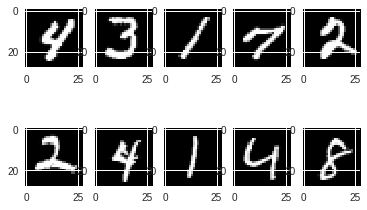

In [3]:
 #Visualising data

Xraw = mnist.data.astype('float128')
yraw = mnist.target.astype('int64')

X_train, X_test, y_train, y_test = train_test_split(Xraw, yraw, test_size=0.25, random_state=42)

X_train = (X_train.T/255)
X_test = (X_test.T/255)
y_train_raw = (y_train.reshape(1,-1))
y_test_raw = (y_test.reshape(1,-1))


Y_train = np.zeros((10, y_train_raw.shape[1]))
Y_test = np.zeros((10, y_test_raw.shape[1]))


for i,j in enumerate(y_train_raw.T):
  Y_train[j,i]=1
for i,j in enumerate(y_test_raw.T):
  Y_test[j,i]=1

X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

for i in range(10):
  temp = random.randint(0, mnist.data.shape[1])
  plt.subplot(2,5,i+1)
  plt.imshow((X_train.T)[temp].reshape(28,28), cmap = 'gray')
  
plt.show()

In [0]:
def sigmoid(x):
  return 1/(1+np.e ** -x)

def derive_sigmoid(x):
  return np.multiply(x,(1-x))

def forwardProp(W,X):
    
  cache = {}
  W1 = W[0]
  b1 = W[1]
  
  z1 = (np.dot(W1, X)) + b1
  a1 = sigmoid(z1).astype('float32')
  
  cache = {"a1" : a1, "z1":z1}
  return cache
    
def cost(AL,Y,m):
  cost = -1/m*np.sum((np.multiply(Y,np.log(AL))+np.multiply(1-Y,np.log(1-AL))))
  return cost

def backProp(cache, y, X, W, alpha=0.1,m = 70000):
  W1 = W[0]
  b1 = W[1]
  
  dz = cache["a1"]- y
  dw = 1/m*np.dot(dz, X.T)
  db = 1/m*np.sum(dz, axis = 1, keepdims = True)
  
  W1 = W1 - alpha*dw
  
  b1 = b1 - alpha*db
  W = [W1,b1]
  return W

6.933833815981092
2.919115131854605
1.9543695120673803
1.7594835576198904
1.6286752490897374
1.532604299579838
1.4585784409556237
1.3994717561244447
1.3509697517055133
1.3103027159385654
1.2756073674543187
1.2455812502139603
1.219284433798085
1.196020107562735
1.175259697133306
1.1565942292220766
1.1397017779835268
1.1243250870578896
1.1102558229994055
1.097323272658679
1.0853860578734367
1.0743259873302793
1.0640433975213495
1.0544536000577895
1.045484115859906
1.0370725167683392
1.0291647098462404
1.0217135649846238
1.0146778161590935
1.008021156322752
1.0017115061091375
0.995720403375917
0.9900225004203149
0.984595143943826
0.9794180167066204
0.9744728448646622
0.9697431382914601
0.965213979314632
0.9608718328219688
0.9567043902443635
0.9527004308037398
0.9488497023531752
0.9451428159512298
0.94157115733654
0.9381268085284699
0.9348024747276741
0.9315914236994938
0.9284874355994397
0.9254847499483437
0.9225780260898189
0.9197623027774269
0.9170329667384146
0.9143857222342558
0.91181

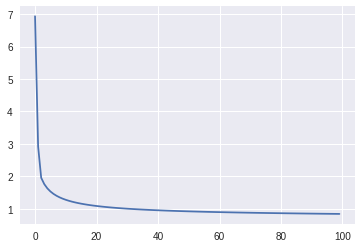

In [26]:
layers = [784,10]
costarr = []
W1 = np.random.rand(layers[1], layers[0])*np.sqrt(1/layers[0])*0.01
b1 = np.zeros((layers[1],1)).astype('float32')

W = [W1,b1]  
m = X_train_scaled.shape[1]
for i in range(200):
    cache = forwardProp(W,X_train_scaled)
    W = backProp(cache, Y_train,X_train_scaled, W, 0.05,m)
    if(i%2 == 0):
        a = cost(cache["a1"], Y_train, m)
        print(a)
        costarr.append(a)

plt.plot(costarr)
plt.show()

In [0]:
def predict(xin,W):
  cache = forwardProp(W,xin)
  return cache["a1"]

def predict_test(xin,y, W):
  op = predict(xin, W)
  op = (op==np.max(op, axis = 0))
  wrong = np.sum(np.abs(op - y), axis = 0)
  acc = np.sum(wrong == 0)/xin.shape[1]*100
  return acc

/usr/local/lib/python3.6/dist-packages/matplotlib/image.py:369: UserWarning: Casting input data from 'float128' to 'float64'for imshow
  "for imshow".format(A.dtype))


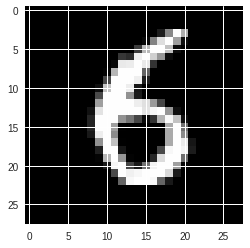

6


In [29]:
num = 1399
plt.imshow((X_train.T)[num].reshape(28,28), cmap = 'gray')
plt.show()
cache = predict((X_train.T)[num].reshape(-1,1), W)

print(np.argmax(cache))



In [32]:
acc = predict_test(X_test_scaled, Y_test, W)
print(acc)

89.35428571428572
